In [1]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 26s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
#converting to 1D array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
y_test = y_test.reshape(-1,)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [15]:
def plot_sample(X, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

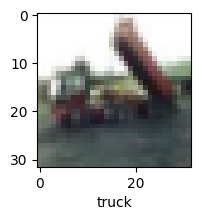

In [16]:
plot_sample(X_train, y_train, 2)

Normalizing the training data

In [17]:
X_train = X_train / 255.0
X_test = X_test / 255.0

CNN model

In [44]:
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [45]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
cnn.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 50s 126ms/step - loss: 1.5103 - accuracy: 0.4577 - val_loss: 1.2527 - val_accuracy: 0.5555
Epoch 2/10
391/391 [==============================] - 45s 115ms/step - loss: 1.1305 - accuracy: 0.6058 - val_loss: 1.0486 - val_accuracy: 0.6357
Epoch 3/10
391/391 [==============================] - 47s 121ms/step - loss: 0.9921 - accuracy: 0.6562 - val_loss: 1.0061 - val_accuracy: 0.6514
Epoch 4/10
391/391 [==============================] - 47s 119ms/step - loss: 0.8944 - accuracy: 0.6913 - val_loss: 0.9321 - val_accuracy: 0.6787
Epoch 5/10
391/391 [==============================] - 48s 123ms/step - loss: 0.8221 - accuracy: 0.7163 - val_loss: 0.9922 - val_accuracy: 0.6629
Epoch 6/10
391/391 [==============================] - 49s 126ms/step - loss: 0.7597 - accuracy: 0.7391 - val_loss: 0.8790 - val_accuracy: 0.7015
Epoch 7/10
391/391 [==============================] - 48s 124ms/step - loss: 0.6998 - accuracy: 0.7595 - val_loss: 0.8812 - val_ac

In [47]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.8705 - accuracy: 0.7121


[0.8704954385757446, 0.7121000289916992]

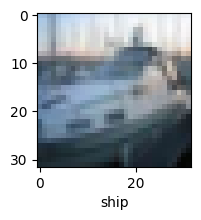

In [48]:
plot_sample(X_test, y_test, 2)

In [49]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]

313/313 [==============================] - 3s 11ms/step


In [50]:
classes[y_pred_classes[2]]

'airplane'

In [51]:
#predictions
print(y_pred_classes[:5])

#actual values
print(y_test[:5])

[3, 8, 0, 0, 6]
[3 8 8 0 6]


In [52]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      1000
           1       0.81      0.86      0.83      1000
           2       0.70      0.53      0.60      1000
           3       0.53      0.51      0.52      1000
           4       0.73      0.61      0.67      1000
           5       0.52      0.73      0.61      1000
           6       0.82      0.76      0.79      1000
           7       0.71      0.79      0.75      1000
           8       0.90      0.74      0.81      1000
           9       0.82      0.78      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000

